# FDA Adverse Events
Author: Daisy Nsibu

language: python

## imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/global/common/software/nersc/pm-2022q4/sw/tensorflow/2.6.0/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## load data

In [2]:
df=pd.read_csv('train/CAERS_ProductBased.csv')
df.columns

Index(['DATE_FDA_FIRST_RECEIVED_REPORT', 'REPORT_ID', 'DATE_EVENT',
       'PRODUCT_TYPE', 'PRODUCT', 'PRODUCT_CODE', 'DESCRIPTION', 'PATIENT_AGE',
       'AGE_UNITS', 'SEX', 'CASE_MEDDRA_PREFERRED_TERMS', 'CASE_OUTCOME',
       'Unnamed: 12'],
      dtype='object')

## data cleaning

In [3]:
df=df.drop(axis=1, labels=['Unnamed: 12'])
# df.to_csv('CAERS_ProductBased.csv')

In [4]:
print(df.shape)
df.info()

(206606, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206606 entries, 0 to 206605
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   DATE_FDA_FIRST_RECEIVED_REPORT  206606 non-null  object 
 1   REPORT_ID                       206606 non-null  object 
 2   DATE_EVENT                      142088 non-null  object 
 3   PRODUCT_TYPE                    206606 non-null  object 
 4   PRODUCT                         206605 non-null  object 
 5   PRODUCT_CODE                    206606 non-null  object 
 6   DESCRIPTION                     206606 non-null  object 
 7   PATIENT_AGE                     138729 non-null  float64
 8   AGE_UNITS                       138729 non-null  object 
 9   SEX                             197296 non-null  object 
 10  CASE_MEDDRA_PREFERRED_TERMS     206606 non-null  object 
 11  CASE_OUTCOME                    206606 non-null  object 
dtypes: 

In [5]:
# Removing rows related to 'Exemption 4' products
df=df[df['PRODUCT']!="EXEMPTION 4"]
df

,DATE_FDA_FIRST_RECEIVED_REPORT,REPORT_ID,DATE_EVENT,PRODUCT_TYPE,PRODUCT,PRODUCT_CODE,DESCRIPTION,PATIENT_AGE,AGE_UNITS,SEX,CASE_MEDDRA_PREFERRED_TERMS,CASE_OUTCOME
0,6/30/2023,2023-CFS-006722,6/27/2023,SUSPECT,AIRLINE FOOD SERVED BY UNITED AIRLINES,37,Mult Food Dinner/Grav/Sauce/Special,45.0,year(s),Male,"Diarrhoea, Food poisoning, Pyrexia, Tremor, Vo...",Other Serious or Important Medical Event
1,6/30/2023,2023-CFS-006720,NaN,SUSPECT,ONE A DAY WOMEN'S,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,NaN,Suicidal ideation,Other Serious Outcome
2,6/30/2023,2023-CFS-006718,6/22/2023,SUSPECT,RITUAL ESSENTIAL PRENATAL MULTIVITAMIN,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Female,Chest pain,"Hospitalization, Other Serious or Important Me..."
3,6/30/2023,2023-CFS-006717,NaN,SUSPECT,METAMUCIL,54,Vit/Min/Prot/Unconv Diet(Human/Animal),46.0,year(s),Female,"Pain, Vomiting","Hospitalization, Other Serious or Important Me..."
4,6/30/2023,2023-CFS-006714,NaN,SUSPECT,NATURE'S BOUNTY CALCIUM 1200MG PLUS 25MCG (100...,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,NaN,"Nephrolithiasis, Renal injury","Hospitalization, Visited Emergency Room, Other..."
...,...,...,...,...,...,...,...,...,...,...,...,...
206601,12/23/1999,100748,8/20/1999,SUSPECT,GERO VITA ARTHRO 7,54,Vit/Min/Prot/Unconv Diet(Human/Animal),65.0,year(s),Male,"BLINDNESS, DECREASED IMMUNE RESPONSIVENESS, HE...","Required Intervention, Visited a Health Care P..."
206602,5/13/1999,100920,NaN,SUSPECT,AM 300,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Female,"HEART RATE INCREASED, SYNCOPE",Hospitalization
206603,5/13/1999,100919,NaN,SUSPECT,AM-300,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Female,"DIZZINESS, FEELING ABNORMAL","Hospitalization, Visited Emergency Room"
206604,5/13/1999,100918,NaN,SUSPECT,AM 300,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Female,"HYPERVENTILATION, PALPITATIONS","Hospitalization, Visited Emergency Room"


In [6]:
# New dataset information after removal of Exemption 4 rows
cleaned_data_info = df.info()
cleaned_data_info


<class 'pandas.core.frame.DataFrame'>
Int64Index: 140236 entries, 0 to 206605
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   DATE_FDA_FIRST_RECEIVED_REPORT  140236 non-null  object 
 1   REPORT_ID                       140236 non-null  object 
 2   DATE_EVENT                      93932 non-null   object 
 3   PRODUCT_TYPE                    140236 non-null  object 
 4   PRODUCT                         140235 non-null  object 
 5   PRODUCT_CODE                    140236 non-null  object 
 6   DESCRIPTION                     140236 non-null  object 
 7   PATIENT_AGE                     96526 non-null   float64
 8   AGE_UNITS                       96526 non-null   object 
 9   SEX                             132130 non-null  object 
 10  CASE_MEDDRA_PREFERRED_TERMS     140236 non-null  object 
 11  CASE_OUTCOME                    140236 non-null  object 
dtypes: float64(1), o

## Descriptive Analysis:

In [7]:
statistical_summary = df.describe()

statistical_summary.transpose()

,count,mean,std,min,25%,50%,75%,max
PATIENT_AGE,96526.0,50.163195,22.480709,1.0,34.0,52.0,67.0,365.0


In [8]:
# AGE UNITS are in weeks, days, decades,etc SO I'LL CONVERT THE AGE UNITS TO YEARS FOR SIMPLICITY
print(df['AGE_UNITS'].unique())

['year(s)' nan 'month(s)' 'week(s)' 'day(s)' 'decade(s)']


In [9]:
def convert_age_to_years(row):
    age = row['PATIENT_AGE']
    unit = row['AGE_UNITS']
    years='Years'
    if pd.isna(age) or pd.isna(unit):
        return age, unit

    try:
        age = float(age)
        if unit == 'month(s)':
            return round(age / 12,2), years
        elif unit == 'week(s)':
            return round(age / 52, 2), years
        elif unit == 'day(s)':
            return round(age / 365,2), years
        elif unit == 'decade(s)':
            return round(age / 10, 2), years
        else:  # Assuming 'Years' or any other unit is already in years
            return age, years
    except ValueError:
        # In case age cannot be converted to float
        return None, unit

df[['PATIENT_AGE', 'AGE_UNITS']] = df.apply(convert_age_to_years, axis=1, result_type='expand')

updated_age_units = df['AGE_UNITS'].unique()
updated_age_units

array(['Years', nan], dtype=object)

In [10]:
statistical_summary = df.describe()

statistical_summary.transpose()

,count,mean,std,min,25%,50%,75%,max
PATIENT_AGE,96526.0,49.743601,22.597762,0.0,34.0,52.0,67.0,122.75


## Pattern Identification:
* Identify any trends in adverse events over time.
* Determine if certain product types or specific products are associated with more severe outcomes.

In [11]:
# Analyzing the frequency of adverse events per des
product_frequency = df['DESCRIPTION'].value_counts()/len(df)*100
print(product_frequency.round().head(10))

Vit/Min/Prot/Unconv Diet(Human/Animal)          59.0
Cosmetics                                       10.0
Nuts/Edible Seed                                 4.0
Vegetables/Vegetable Products                    3.0
Soft Drink/Water                                 2.0
Bakery Prod/Dough/Mix/Icing                      2.0
Fruit/Fruit Prod                                 2.0
Fishery/Seafood Prod                             2.0
Cereal Prep/Breakfast Food                       2.0
Dietary Conventional Foods/Meal Replacements     1.0
Name: DESCRIPTION, dtype: float64


In [12]:
# Analyzing the frequency of adverse events 
case_frequency = df['CASE_OUTCOME'].value_counts()
print(case_frequency)

Other Serious or Important Medical Event                                                    35794
Other Outcome                                                                               33277
Hospitalization                                                                              8724
Other Serious or Important Medical Event, Visited a Health Care Provider                     8168
Visited a Health Care Provider                                                               6380
                                                                                            ...  
Hospitalization, Visited Emergency Room, Allergic Reaction, Other Serious Outcome               1
Death, Life Threatening, Visited Emergency Room, Visited a Health Care Provider                 1
Hospitalization, Congenital Anomaly                                                             1
Death, Congenital Anomaly, Visited Emergency Room                                               1
Life Threatening, Ho

In [13]:

outcomes_set = set()
for outcomes in df['CASE_OUTCOME'].dropna():
    split_outcomes = outcomes.split(', ')# Splitting the outcomes and adding them
    outcomes_set.update(split_outcomes)


total_unique_outcomes = len(outcomes_set)
total_unique_outcomes, outcomes_set

(13,
 {'Allergic Reaction',
  'Congenital Anomaly',
  'Death',
  'Disability',
  'Hospitalization',
  'Injury',
  'Life Threatening',
  'Other Outcome',
  'Other Serious Outcome',
  'Other Serious or Important Medical Event',
  'Required Intervention',
  'Visited Emergency Room',
  'Visited a Health Care Provider'})

### low Severity Cases:
* Allergic Reaction
* Other Outcome
* Injury (assuming these are minor injuries)
### Mid Severity Cases:
* Visited Emergency Room
* Visited a Health Care Provider
* Required Intervention (not life-threatening but significant enough to require medical intervention)
### Serious Cases:
* Death
* Life Threatening
* Hospitalization
* Disability
* Congenital Anomaly
* Other Serious Outcome
* Other Serious or Important Medical Event

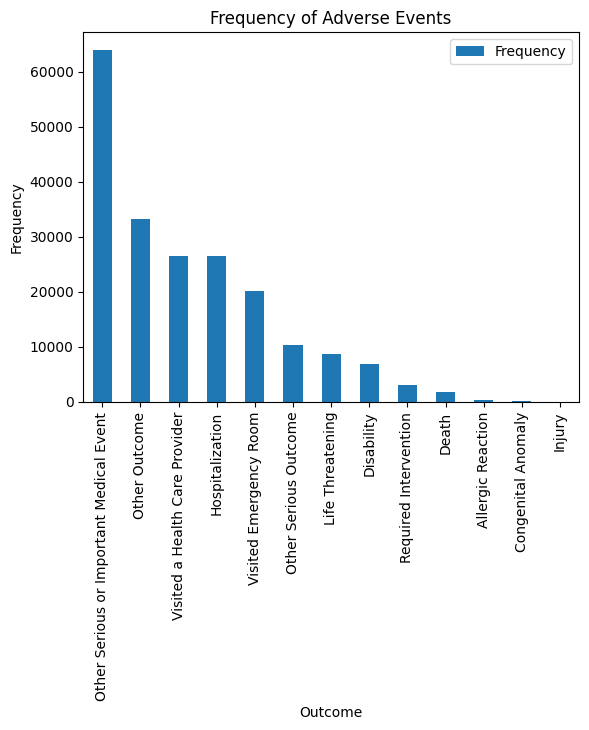

In [14]:

outcome_counts = {outcome: 0 for outcome in outcomes_set}

for outcomes in df['CASE_OUTCOME'].dropna():
    split_outcomes = outcomes.split(', ')
    for outcome in split_outcomes:
        if outcome in outcome_counts:
            outcome_counts[outcome] += 1

# Convert the dictionary to a DataFrame for analysis
outcome_counts_df = pd.DataFrame(list(outcome_counts.items()), columns=['Outcome', 'Frequency'])

# Sort the DataFrame by frequency for better analysis
outcome_counts_df = outcome_counts_df.sort_values(by='Frequency', ascending=False)

# Visualize Frequency of Adverse Events'
import matplotlib.pyplot as plt
outcome_counts_df.plot(kind='bar', x='Outcome', y='Frequency')
plt.title('Frequency of Adverse Events')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.show()


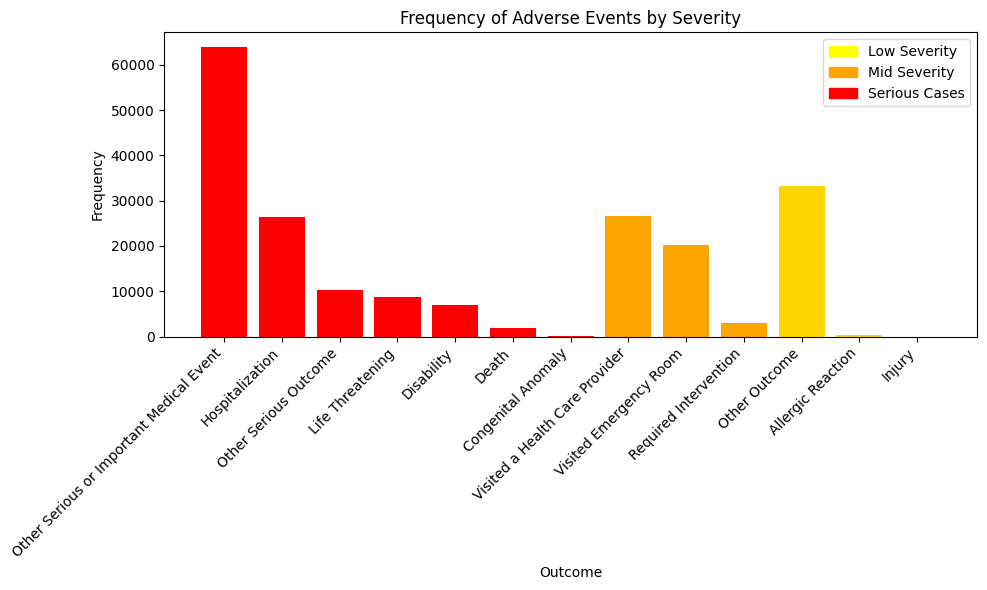

In [15]:
outcome_counts = {outcome: 0 for outcome in outcomes_set}
for outcomes in df['CASE_OUTCOME'].dropna():
    split_outcomes = outcomes.split(', ')
    for outcome in split_outcomes:
        if outcome in outcome_counts:
            outcome_counts[outcome] += 1

outcome_counts_df = pd.DataFrame(list(outcome_counts.items()), columns=['Outcome', 'Frequency'])

# severity categories
low_severity = ['Allergic Reaction', 'Other Outcome', 'Injury']
mid_severity = ['Visited Emergency Room', 'Visited a Health Care Provider', 'Required Intervention']
serious_severity = ['Death', 'Life Threatening', 'Hospitalization', 'Disability', 'Congenital Anomaly', 
                    'Other Serious Outcome', 'Other Serious or Important Medical Event']

# colors based on severity
outcome_counts_df['Color'] = outcome_counts_df['Outcome'].apply(
    lambda x: 'gold' if x in low_severity else 'orange' if x in mid_severity else 'red'
)

# Sort 
outcome_counts_df['Severity'] = outcome_counts_df['Outcome'].apply(
    lambda x: 1 if x in low_severity else 2 if x in mid_severity else 3
)
outcome_counts_df = outcome_counts_df.sort_values(by=['Severity','Frequency'], ascending=False)
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(outcome_counts_df['Outcome'], outcome_counts_df['Frequency'], color=outcome_counts_df['Color'])
plt.title('Frequency of Adverse Events by Severity')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha="right")

plt.legend([plt.Rectangle((0,0),1,1, color=color) for color in ['yellow', 'orange', 'red']],
           ['Low Severity', 'Mid Severity', 'Serious Cases'])

plt.tight_layout()
plt.show()



In [16]:
# Analyzing the severity of adverse events based on case outcomes
severity_categories = ['Death', 'Life Threatening', 'Hospitalization', 'Disability', 'Other Serious Outcome']
df['Severity'] = df['CASE_OUTCOME'].apply(
    lambda x: any(category in x for category in severity_categories)
)

# Counting the number of severe cases per product
severe_cases_per_product = df[caers_data_cleaned['Severity']].groupby('PRODUCT').size()

# Displaying the top 10 products with the highest frequency of reports and the top 10 with the most severe cases
top_10_frequent_products = product_frequency.head(10)
top_10_severe_products = severe_cases_per_product.nlargest(10)

top_10_frequent_products, top_10_severe_products

NameError: name 'caers_data_cleaned' is not defined

## Risk Assessment:
* Evaluate products/product categories with higher frequencies of severe outcomes.

In [22]:
serious_severity = ['Death', 'Life Threatening', 'Hospitalization', 'Disability', 'Congenital Anomaly', 
                    'Other Serious Outcome', 'Other Serious or Important Medical Event']

df_severe = df[df['CASE_OUTCOME'].apply(lambda x: any(outcome in x for outcome in serious_severity))]

product_severity_count = df_severe.groupby('PRODUCT').size().sort_values(ascending=False)

product_severity_count=product_severity_count.head(10)


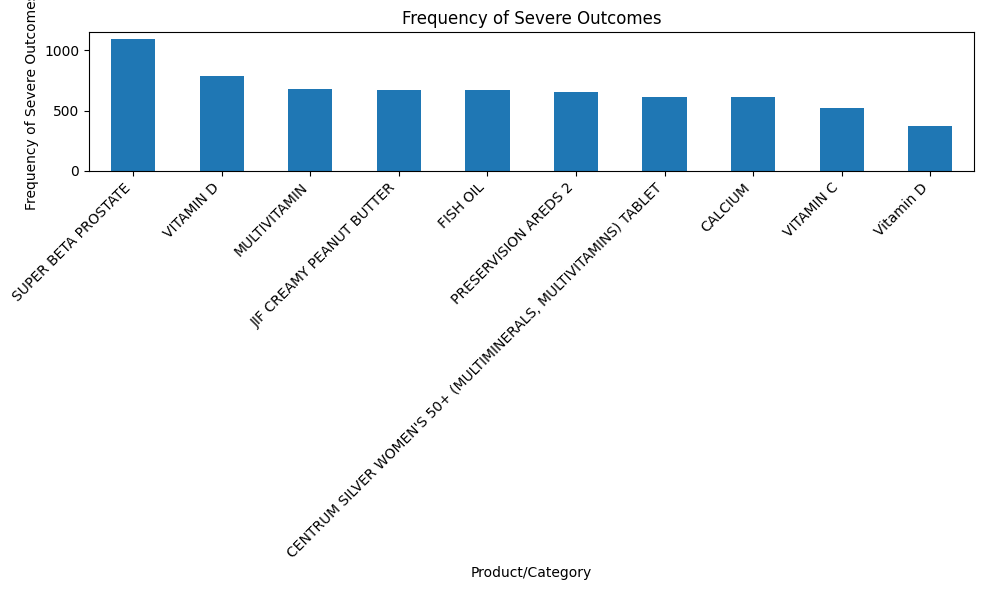

In [23]:
# Plotting
plt.figure(figsize=(10, 6))  # Adjust the size as needed
product_severity_count.plot(kind='bar')
plt.title('Frequency of Severe Outcomes')
plt.xlabel('Product/Category')
plt.ylabel('Frequency of Severe Outcomes')
plt.xticks(rotation=45, ha="right")  
plt.tight_layout()  # Adjust the layout
plt.show()


## Recommendations for FDA:
* Based on the analysis, the following products might require further investigation or regulatory action due to have the most adverse serious events

In [25]:
product_severity_count

PRODUCT
SUPER BETA PROSTATE                                                 1096
VITAMIN D                                                            792
MULTIVITAMIN                                                         677
JIF CREAMY PEANUT BUTTER                                             668
FISH OIL                                                             668
PRESERVISION AREDS 2                                                 652
CENTRUM SILVER WOMEN'S 50+ (MULTIMINERALS, MULTIVITAMINS) TABLET     616
CALCIUM                                                              614
VITAMIN C                                                            525
Vitamin D                                                            376
dtype: int64